<h2 style='color:purple' align='center'>Customer churn prediction</h2>

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

### Importing the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**We see that there are no null values in the dataset**

**There are some unique columns in the dataset which can be dropped**

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

## EDA

<Axes: xlabel='Exited', ylabel='count'>

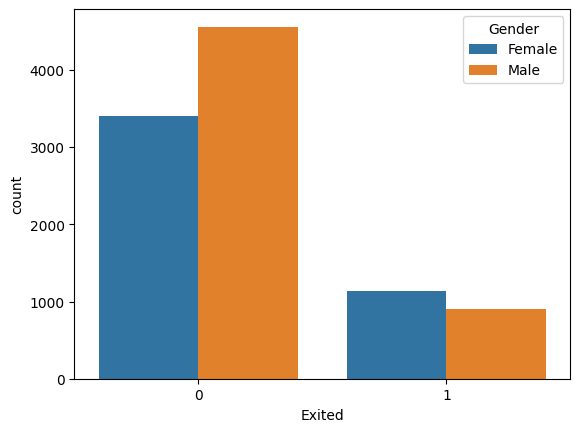

In [17]:
sns.countplot(x='Exited',hue='Gender',data=df)

<Axes: xlabel='Exited', ylabel='count'>

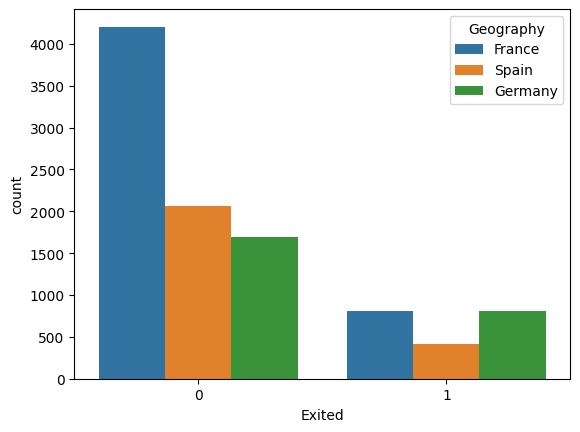

In [18]:
sns.countplot(x='Exited',hue='Geography',data=df)

<Axes: xlabel='Tenure', ylabel='Count'>

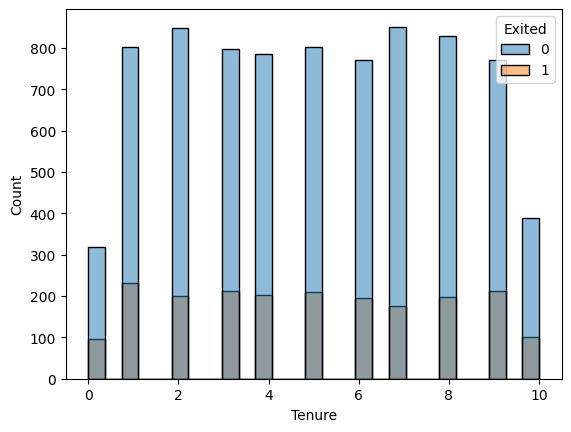

In [27]:
# df['Tenure'].plot(kind='hist')
sns.histplot(x='Tenure',hue='Exited',data=df)

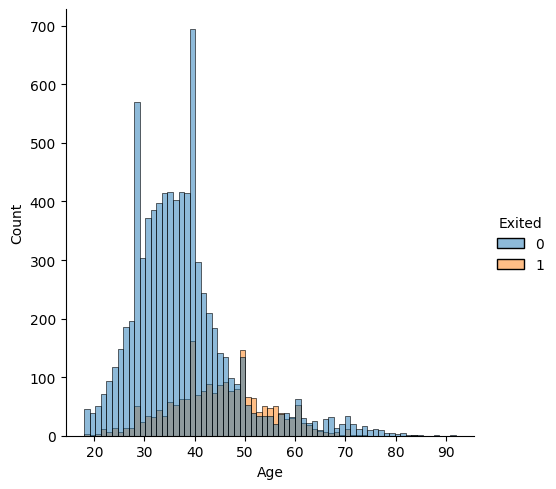

In [31]:
sns.displot(x='Age',hue='Exited',data=df)

<Axes: xlabel='Exited', ylabel='count'>

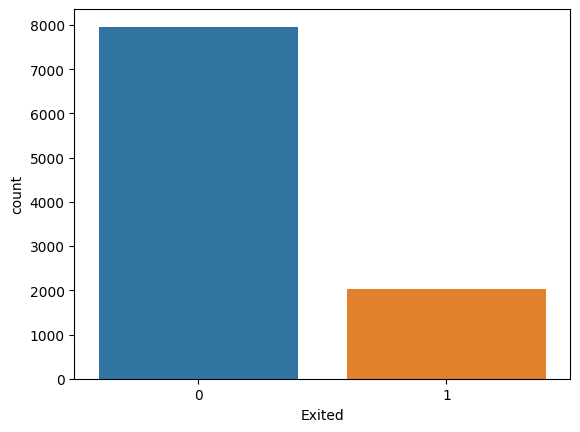

In [32]:
sns.countplot(x='Exited',data=df)

### Encoding the categorical features

In [8]:
df.select_dtypes(include=['object'])

Index(['Geography', 'Gender'], dtype='object')

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df_encoded = pd.get_dummies(df,columns=['Geography'])

In [15]:
df_encoded = pd.get_dummies(df_encoded,columns=['Gender'],drop_first=True)

In [16]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True


In [51]:
df_encoded[['Geography_France','Geography_Germany','Geography_Spain','Gender_Male']] = df_encoded[['Geography_France','Geography_Germany','Geography_Spain','Gender_Male']].astype(int)

<Axes: >

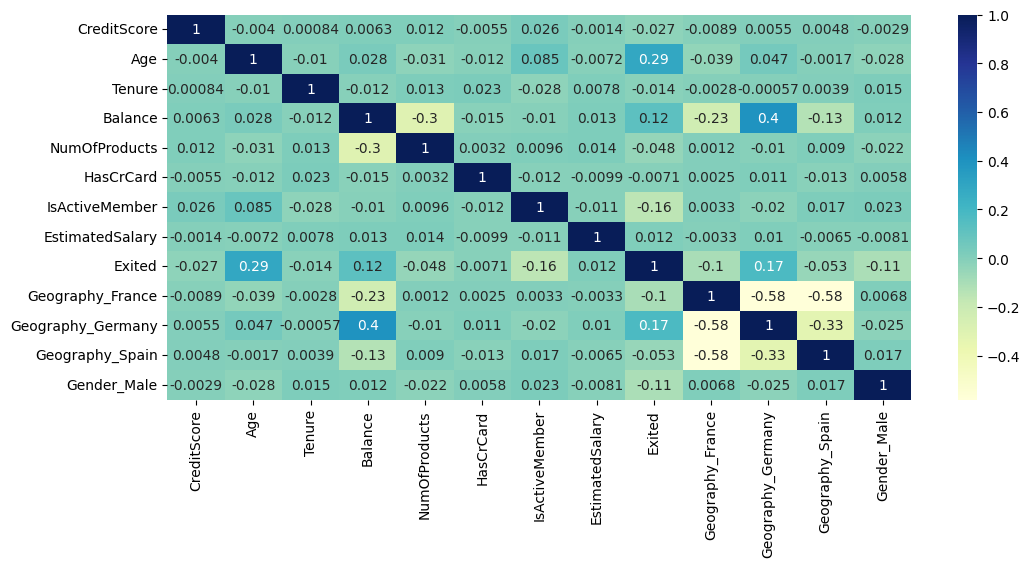

In [42]:
plt.figure(figsize=(12,5))
sns.heatmap(df_encoded.corr(),cmap='YlGnBu',annot=True)

**From the above plot we can infer that the target variable "Exited" has high positive correlation with the columns: ["Age","Geography_Germany","Balance"]**

**The target variable "Exited" has a negative correlation with the columns: ["IsActiveMember", "Gender_Male"]**


### Handling class imbalance

In [55]:
from imblearn.over_sampling import SMOTE

In [33]:
df_encoded['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [54]:
X = df_encoded.drop('Exited',axis=1)
y = df['Exited']

In [56]:
smote = SMOTE(sampling_strategy='auto',random_state=42)
X,y = smote.fit_resample(X,y)

In [59]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
X

array([[-0.3257645 ,  0.10264284, -1.03967004, ..., -0.57739861,
        -0.46176255, -0.83376076],
       [-0.44538022,  0.00281445, -1.40643088, ..., -0.57739861,
         2.16561521, -0.83376076],
       [-1.59804084,  0.10264284,  1.16089502, ..., -0.57739861,
        -0.46176255, -0.83376076],
       ...,
       [-0.49975101, -0.89564103, -0.67290919, ...,  1.73190581,
        -0.46176255, -0.83376076],
       [ 0.90301521,  0.60178477,  0.06061249, ..., -0.57739861,
        -0.46176255, -0.83376076],
       [ 0.62028714, -0.99546941,  0.79413418, ..., -0.57739861,
        -0.46176255, -0.83376076]])

### Train test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Data modelling, predictions and evaluation

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create an empty dictionary to store model evaluation results
results = {}

# Loop through the models, train, and evaluate them
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    model_score = model.score(X_test,y_test)  # Evaluate model performance
    results[model_name] = model_score  # Store results in the dictionary
    print(f'{model_name.upper()}: \nModel score = {model_score:.2f}')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_pred))

LOGISTIC REGRESSION: 
Model score = 0.82
Confusion Matrix:
[[1740  296]
 [ 440 1506]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      2036
           1       0.84      0.77      0.80      1946

    accuracy                           0.82      3982
   macro avg       0.82      0.81      0.81      3982
weighted avg       0.82      0.82      0.81      3982

RANDOM FOREST: 
Model score = 0.88
Confusion Matrix:
[[1813  223]
 [ 250 1696]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2036
           1       0.88      0.87      0.88      1946

    accuracy                           0.88      3982
   macro avg       0.88      0.88      0.88      3982
weighted avg       0.88      0.88      0.88      3982

ADABOOST: 
Model score = 0.85
Confusion Matrix:
[[1745  291]
 [ 311 1635]]
Classification Report:
              precision    recall  f

**From the model evaluation, we can understand that the 2 best performing models are Random Forest Classifier and Gradient Boosting Classifier**